# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
# Cycling through all the datasets' filenames to display them
filenames = [adultDataSet_filename,airbnbDataSet_filename,WHRDataSet_filename,bookReviewDataSet_filename]
for x in filenames:
    df=pd.read_csv(x)
    print(df.head())
    print('----------------------------------------------------------------')

# Chosen book review data set
df=pd.read_csv(bookReviewDataSet_filename)

    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States         <=50K 

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Answers:
1. The dataset I've chosen is the Book Review data set, which is a dataset of reviews in text form, with another column labeling each review as positive or not positive.
2. I will be predicting whether a particular review is positive or not positive. The label will be 'Positive Review'
3. This will be a supervised learning problem with a binary classification algorithm that uses NLP to categorize each review.
4. There is only one feature, which is the 'Review' column.
5. This is an important problem for a company because reviews will reflect how a particular item/concept is perceived in customer's eyes and experiences. Not only will the classification of reviews be important for customer feedback and product improvement, it also reduces the human capital that would be otherwise used to classify reviews manually and finding ways to improve products by human inspection. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Review             0
Positive Review    0
dtype: int64
                                                   Review Positive Review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993

Datatype of Review column:  object
Datatype of Positive Review column:  bool


<AxesSubplot: >

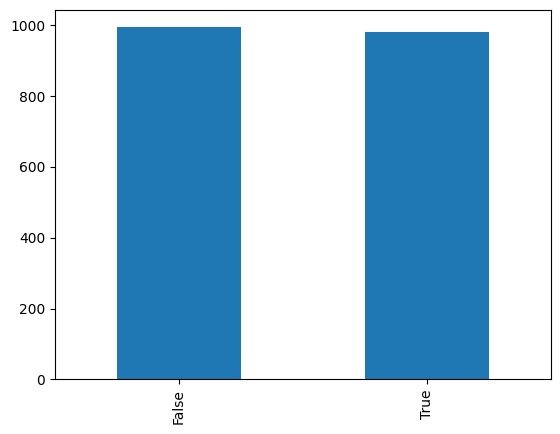

In [3]:
# First check for Null or NA entries
print(df.isna().sum())
# Since we see that there are no NA entries, we can proceed to see some general information
print(df.describe())
print()
print('Datatype of Review column: ',df['Review'].dtypes)
print('Datatype of Positive Review column: ',df['Positive Review'].dtypes)

# Check for class imbalance
df['Positive Review'].value_counts().plot(kind='bar')

# We see that the review count for each class is balanced. Movign on.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

### Answer:
* The feature list stays the same, containing only 'Review' column since we are working with text data without null values.
* I plan to convert all text to lowercase, remove special characters and stopwords from the text, tokenize the text (split it into smaller chunks), and lemmatize the text (converting a word to its root word) using gensim package, then produce word embeddings vectors using Word2Vec, which can be used in training models once its vector lengths has been normalized as it's now numerical data.
* The model I will use is a Logistic Regression model that uses the numerical word embedding vectors to predict the label.
* I will use a 0.3 train_test_split and use roc_auc_score to analyze its performance. If the logistic regression model fails to capture the complexity of our classification problem, I will vectorize it using TfidfVectorizer and train a Neural Network instead. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
!pip install -U gensim
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


2024-08-01 03:05:41.352473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 03:05:41.352505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
X = df['Review']
y = df['Positive Review']

In [6]:
# Using gensim to apply processing function to all rows in the feature column
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_train.head()

724     [this, is, nice, small, book, to, take, along,...
1524    [purchased, this, book, several, months, ago, ...
1090    [when, found, hour, game, in, paperback, at, o...
1547    [have, reviewed, all, chapters, of, psycho, ba...
1928    [qbq, by, john, miller, is, simply, amazing, t...
Name: Review, dtype: object

In [7]:
# Using Word2Vec to produce word embedding vectors
# Creating model object
print("Begin Word2Vec model creation")
word2vec_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

#Visualize
top25 = word2vec_model.wv.index_to_key[:25]
pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)

Begin Word2Vec model creation
End


/tmp/ipykernel_2380/744421742.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
the,-0.07,0.55,0.46,0.64,-0.18,-1.21,1.01,2.07,-0.81,-1.29,-0.47,-1.29,0.05,0.18,0.09,-0.26,0.22,-0.31,-0.83,-1.80,0.24,0.81,0.54,-0.26,0.13,-0.02,-0.37,-0.14,-0.24,0.21,0.81,0.03,0.67,-0.82,-0.20,0.52,0.59,-0.76,0.15,-1.70,-0.29,-0.14,-0.73,-1.06,0.01,-0.06,-0.38,0.20,0.59,0.95,-0.02,-0.56,-0.45,-0.15,0.04,-0.14,0.39,-0.14,-1.01,0.71,0.36,0.03,0.45,-0.44,-0.85,1.20,0.31,-0.02,-0.74,0.84,-0.17,1.03,1.10,-0.10,-0.24,-0.07,0.09,-0.20,-0.54,-0.33,-0.19,0.45,-0.76,0.33,-0.39,-0.46,0.17,0.71,0.50,0.12,0.64,0.48,0.88,0.05,1.47,0.58,-0.08,-1.06,0.53,0.05
of,-0.25,0.74,-0.01,0.22,0.44,-1.38,1.07,2.40,-0.65,-1.23,-0.49,-1.34,-0.07,-0.21,0.45,-0.25,0.27,-0.45,-0.39,-1.56,-0.17,0.39,0.49,-0.24,0.17,0.17,-0.41,-0.28,-0.01,0.30,1.09,-0.46,0.39,-0.94,0.04,0.90,0.76,-0.54,0.51,-1.58,-0.25,-0.51,-0.92,-1.04,-0.16,-0.14,-0.27,0.06,0.39,0.91,0.47,-0.86,-0.41,-0.08,0.02,-0.12,0.61,0.24,-1.04,0.29,0.16,-0.04,0.55,-0.27,-1.04,1.39,0.65,-0.26,-0.71,0.79,-0.25,0.72,1.09,0.41,-0.21,-0.06,-0.44,-0.14,-0.62,-0.01,-0.43,0.51,-0.69,0.18,-0.20,-0.58,-0.18,0.97,0.95,-0.09,0.93,0.45,1.21,-0.21,1.75,0.61,0.31,-1.04,0.34,-0.17
and,-0.23,0.61,0.25,-0.01,0.28,-1.13,0.53,2.04,-0.54,-1.02,-0.48,-1.41,0.21,0.12,0.54,-0.58,0.14,-0.56,-0.31,-1.39,0.20,0.43,0.54,-0.34,-0.03,-0.01,-0.40,-0.34,-0.28,-0.06,0.81,-0.18,0.42,-0.69,-0.18,0.98,0.36,-0.73,-0.09,-1.75,-0.36,-0.52,-0.55,-0.48,0.25,-0.03,-0.41,-0.12,0.23,0.78,0.41,-0.69,-0.45,-0.20,-0.27,-0.19,0.54,0.21,-0.97,0.12,0.27,0.16,0.29,-0.16,-0.95,1.21,0.42,0.11,-0.80,0.81,-0.17,0.70,1.13,0.14,0.18,0.18,-0.15,-0.23,-0.68,0.14,-0.32,0.17,-0.69,0.47,-0.14,-0.16,0.10,0.71,0.72,0.05,0.99,0.60,0.69,-0.02,1.49,0.72,0.23,-0.92,0.24,-0.17
to,-0.60,0.73,0.06,-0.36,0.46,-1.20,0.03,1.80,-0.63,-0.85,-0.42,-1.26,0.17,0.34,0.81,-0.67,0.46,-0.83,0.02,-1.30,0.62,0.38,1.03,-0.18,-0.36,-0.11,-0.66,-0.07,-0.52,-0.42,0.78,0.05,0.36,-0.50,-0.28,1.43,0.25,-0.47,-0.74,-1.21,-0.27,-0.82,-0.18,0.22,0.56,0.20,-0.50,-0.34,0.04,0.48,0.43,-0.53,-0.39,-0.25,-0.43,-0.25,0.44,0.29,-0.87,-0.32,0.43,0.37,0.36,0.25,-0.94,0.96,0.36,0.47,-0.90,0.76,-0.06,0.31,0.86,0.22,0.76,0.24,-0.13,0.00,-0.64,0.16,-0.44,-0.50,-0.74,0.81,-0.26,0.05,0.45,0.72,0.92,-0.05,1.13,0.72,0.00,0.13,1.50,0.65,0.33,-0.68,-0.04,-0.38
is,-0.29,0.75,-0.08,0.18,0.33,-1.00,0.80,1.84,-0.97,-0.81,-0.57,-1.11,-0.27,0.09,0.24,-0.05,0.55,-0.58,-0.09,-2.00,0.50,0.32,0.83,0.01,-0.28,-0.11,-0.59,0.26,-0.39,0.06,0.81,0.03,0.31,-0.96,-0.15,0.74,0.27,-0.05,-0.08,-0.95,0.05,-0.87,-0.70,0.05,0.40,-0.27,-0.66,-0.17,0.52,0.66,0.34,-0.17,-0.13,-0.25,-0.03,-0.40,0.06,-0.13,-0.94,0.05,0.30,-0.05,0.74,0.21,-0.97,1.21,0.58,0.42,-0.84,0.77,-0.01,0.49,0.54,0.15,0.57,-0.11,0.28,0.37,0.09,-0.40,-0.58,-0.62,-0.73,0.43,-0.75,-0.47,0.48,0.72,0.82,-0.17,0.88,0.57,0.50,0.34,1.70,0.33,0.33,-0.60,0.15,-0.07
in,-0.34,0.67,0.05,0.11,0.30,-1.25,0.75,2.10,-0.69,-1.07,-0.51,-1.29,-0.00,0.00,0.43,-0.38,0.33,-0.59,-0.27,-1.59,0.10,0.45,0.61,-0.21,-0.01,-0.02,-0.51,-0.18,-0.23,0.08,0.97,-0.19,0.40,-0.75,-0.12,0.98,0.46,-0.46,0.06,-1.42,-0.17,-0.63,-0.62,-0.54,0.11,-0.14,-0.45,-0.07,0.30,0.74,0.39,-0.60,-0.33,-0.07,-0.16,-0.20,0.48,0.12,-0.93,0.12,0.32,0.08,0.58,-0.10,-0.97,1.20,0.44,0.04,-0.81,0.70,-0.19,0.63,0.92,0.26,0.22,0.06,-0.21,-0.02,-0.49,-0.01,-0.36,0.02,-0.71,0.41,-0.33,-0.35,0.09,0.82,0.87,0.00,0.90,0.57,0.72,0.01,1.62,0.51,0.24,-0.85,0.26,-0.19
it,-0.28,0.48,0.27,0.27,0.12,-0.73,0.24,1.39,-1.00,-0.64,-0.39,-1.08,-0.04,0.49,0.37,-0.43,0.67,-0.53,-0.32,-1.83,0.75,0.51,1.14,-0.28,-0.24,-0.25,-0.67,0.19,-0.67,-0.25,0.64,0.35,0.46,-0.56,-0.65,0.92,-0.25,-0.32,-0.84,-1.18,0.13,-0.91,-0.16,0.62,0.70,0.06,-0.97,-0.55,0.28,0.43,0.06,-0.34,-0.36,-0.01,-0.62,-0.19,0.16,-0.13,-0.75,0.02,0.48,0.20,0.64,0.26,-0.92,0.92,-0.06,0.83,-1.07,0.62,

In [8]:
# PROCESSING ROWS
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [9]:
# Uniformize the length of each example's vector
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

In [10]:
# Model Training and Performance Analysis using roc_auc_score 
model = LogisticRegression(max_iter=200)
model.fit(X_train_feature_vector, y_train)
probability_predictions = model.predict_proba(X_test_feature_vector)[:,1]
class_label_predictions = model.predict(X_test_feature_vector)

In [11]:
auc = roc_auc_score(y_test, probability_predictions)
acc = accuracy_score(y_test, class_label_predictions)

print('AUC on the test data: {:.4f}'.format(auc))
print('ACC on the test data: {:.4f}'.format(acc))

AUC on the test data: 0.6074
ACC on the test data: 0.6014


Evidently, the logistic regression model does not do too well. This was expected as it's only able to fit linear hyperplanes to separate the to datapoints in this binary classification. We will now use a Neural network instead.

In [12]:
df=pd.read_csv(bookReviewDataSet_filename)
X = df['Review']
y = df['Positive Review']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [41]:
# Build and train the model

model = build_model(X_train_tfidf.shape[1])
history = model.fit(X_train_tfidf.toarray(), y_train,
                    epochs=15,
                    batch_size=32,  # default batch size
                    validation_data=(X_test_tfidf.toarray(), y_test),
                    verbose=1)

Epoch 1/15
50/50 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4968 - val_loss: 0.6925 - val_accuracy: 0.5392
Epoch 2/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5710 - val_loss: 0.6909 - val_accuracy: 0.5519
Epoch 3/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6420 - val_loss: 0.6868 - val_accuracy: 0.6380
Epoch 4/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.7395 - val_loss: 0.6770 - val_accuracy: 0.6759
Epoch 5/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7871 - val_loss: 0.6578 - val_accuracy: 0.7190
Epoch 6/15
50/50 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.8447 - val_loss: 0.6250 - val_accuracy: 0.7848
Epoch 7/15
50/50 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.8802 - val_loss: 0.5775 - val_accuracy: 0.8152
Epoch 8/15
50/50 [==

In [42]:
# Evaluate the model
_, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print(f"\nTest accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_tfidf.toarray())
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Positive']))


Test accuracy: 0.8380

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84       195
    Positive       0.85      0.82      0.84       200

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



While testing out the various hyperparameters took some time, I arrived at this configuration that was the best amongst the ones I've tested so far. I will not claim that this is the best configuration possible, but what I've found to be extremely impactful on the scores is the learning rate, which has to be around order of magnitude of 0.0001. The performance metrics of the model also stop improving at around epochs=10, and a higher epoch number only leads to possible overfitting, so I've put the epoch number at 15.

In comparison to the logistic regression model, this model performs much better. Not to mention, the LR model requires its input vectors to be processed row by row whereas the neural network's input processing can be done more simply, which means that the future predictions if the model is ever deployed for use will be easier and more accessible. Plus, we know that neural networks are better at NLP than linear models like Logistic Regression because of how complex human speech data is. 